<a href="https://colab.research.google.com/github/talitacgs/LinearRegression-HousepricingSaoPaulo/blob/main/LinearRegression_ImersaoAllura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importe das Bibliotecas necessárias na Análise

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

## Carregamento de Dataset Imóveis SP

O objetivo é fazer um modelo de machine learning através do algoritmo de regressão linear para predizer o valor dos imóveis na cidade de São Paulo. 

In [89]:
dados = pd.read_csv("https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv")

## Processamento dos Dados

Nessa etapa será realizada uma análise nos dados, tratamento dos tipos de colunas e exclusão de colunas irrelevantes para o modelo.

In [90]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [91]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


A variável de saída 'Valor' está definida como object, é necessário fazer alguns tratamentos para transformá-la em algum tipo numérico.

In [92]:
dados['Valor'].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [93]:
dados["Valor"].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [94]:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [95]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]

In [96]:
dados_vendas["Valor_anuncio_reais"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_anuncio        9156 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_reais  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


Exclusão de colunas desnecessárias ao Dataframe

In [98]:
dados_vendas = dados_vendas.drop(['Moeda','Valor','Tipo_anuncio','Valor_anuncio'],axis=1)

Cálculo do metro² dos imóveis

In [99]:
dados_vendas["Valor_m2"] = dados_vendas["Valor_anuncio_reais"]/dados_vendas["Metragem"]

In [100]:
dados_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_reais,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,7000.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.0,7459.677419
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.0,3040.000000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.0,2209.677419
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0,5400.000000


In [101]:
top_bairros = dados_vendas["Bairro"].value_counts()[:10].index

In [102]:
dados_vendas.query("Bairro in @top_bairros")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_reais,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,7000.000000
23,Rua Aldo de Azevedo,Vila Madalena,São Paulo,170,2,2,1,1485000.0,8735.294118
30,Rua dos Plátanos,Cidade Jardim,São Paulo,1195,4,4,6,8700000.0,7280.334728
39,Rua Gregório Paes de Almeida,Vila Madalena,São Paulo,401,5,9,4,3890000.0,9700.748130
40,Avenida das Magnólias,Cidade Jardim,São Paulo,420,4,4,4,2200000.0,5238.095238
...,...,...,...,...,...,...,...,...,...
9990,Rua Bragança,Pacaembu,São Paulo,285,3,4,5,2450000.0,8596.491228
9994,Rua Circular do Bosque,Jardim Guedala,São Paulo,655,5,6,4,5000000.0,7633.587786
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,9500000.0,7037.037037
10000,Rua Bauru,Pacaembu,São Paulo,439,2,3,2,5200000.0,11845.102506


## Análise Exploratória dos Dados

In [103]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_reais,Valor_m2
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03,9156.000000
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06,8004.066562
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06,5291.317781
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04,9.333333
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05,4750.000000
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06,6500.000000
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06,9453.781513
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07,80000.000000


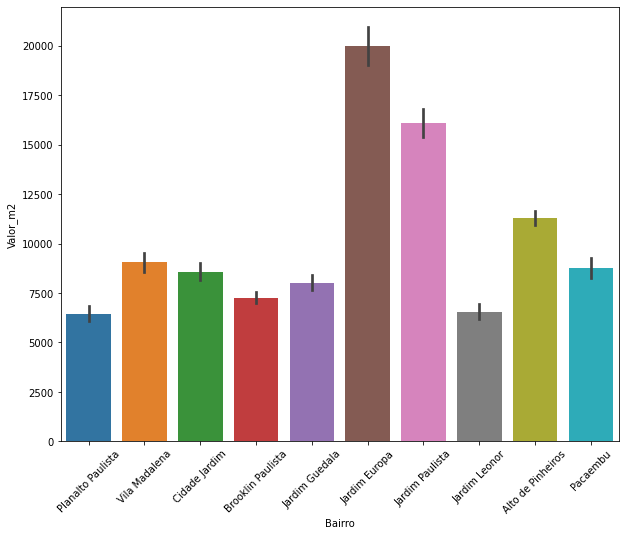

In [104]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Bairro", y="Valor_m2", data=dados_vendas.query("Bairro in @top_bairros"))
ax.tick_params(axis='x', rotation=45)

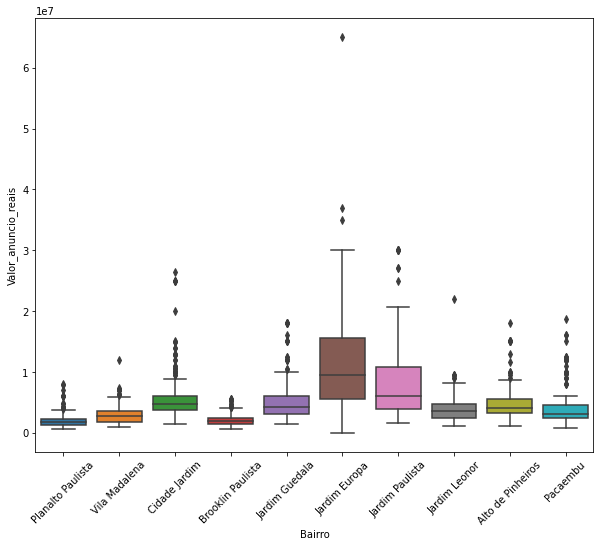

In [105]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros"), x="Bairro", y="Valor_anuncio_reais")
ax.tick_params(axis='x', rotation=45)
plt.show()

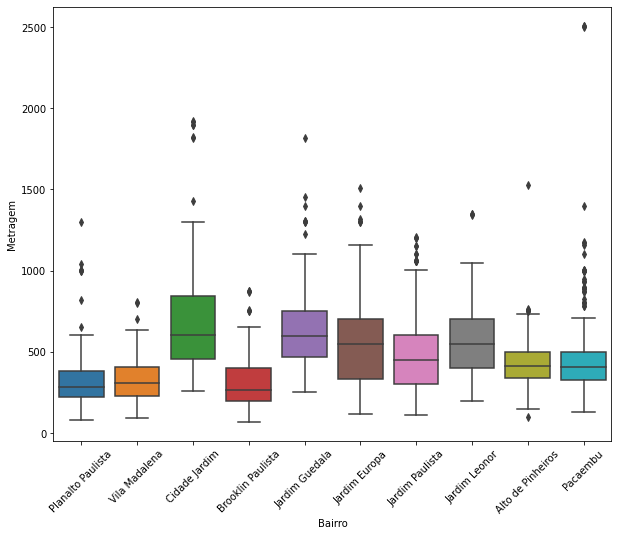

In [106]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros & Metragem < 30000"), x="Bairro", y="Metragem")
ax.tick_params(axis='x', rotation=45)
plt.show()

## Cruzamento de Dados com outros datasets


### Carregamento de Bases de Dados

Os dados do IBGE serão utilizados para enriquecer a análise de previsão do valor de imóvel. Para análise do dataset do IBGE é necessário consultar documentação de levantamento dos dados, para compreensão do significado de cada coluna, disponível em: (https://drive.google.com/file/d/1WVTqfKtHOOk5X1AWaSOn6NLaO7cix2m4/view). O objetivo é avaliar a relação de poder aquisitivo com o valor do metro quadrado do imóvel.



In [107]:
ibge_sp = pd.read_csv(
    'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv',
    encoding='ISO-8859-1',
    sep=';', thousands='.', decimal=','
)
ibge_sp.dropna(how='all', axis=1, inplace=True)
ibge_sp.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


Base de dados com endereços, cujo o objetivo é fazer um cruzamento da latitude e longitude com código_setor da base de dados de IBGE e com o bairro do Dataset de imóveis de SP.

In [108]:
enderecos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Imersão Dados - Allura 2022/enderecos.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [109]:
enderecos.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.0,-30.882674,-55.548830
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.0,-21.190276,-50.448686
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.0,-30.855721,-55.555757
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.0,-30.863149,-55.552083
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.0,-30.864415,-55.545860


### Processamento de Dados


In [110]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

In [111]:
enderecos_sp = enderecos.query("sigla_uf == 'SP'")
enderecos_sp

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.0,-21.190276,-50.448686
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.0,-22.756531,-47.343738
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.0,-22.743734,-47.348631
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.0,-22.737846,-47.333569
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.0,-22.744283,-47.351588
...,...,...,...,...,...,...,...,...,...,...
1113858,Rua,Daniel Buccieri,Rua Daniel Buccieri,NaN,Jardim Alvorada,Monte Mor,SP,13198524.0,-22.926185,-47.265163
1113865,Rua,Ottorino Rizzi,Rua Ottorino Rizzi,NaN,Royal Park,Ribeirão Preto,SP,14028563.0,-21.241158,-47.830249
1113873,Rua,Adriano Michelutti Cândia,Rua Adriano Michelutti Cândia,NaN,Jardim San Marco II,Ribeirão Preto,SP,14035198.0,-21.200525,-47.741982
1113882,Rodovia,Mario Tonolli,Rodovia Mario Tonolli,NaN,Morro Alto,Itupeva,SP,13297002.0,-23.186604,-47.078942


In [112]:
enderecos_sp["rua"] = enderecos_sp["tipo_logr"] + " " + enderecos_sp["logr_nome"]
enderecos_sp["rua"] = enderecos_sp["rua"].str.lower().str.strip()
enderecos_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.0,-21.190276,-50.448686,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.0,-22.756531,-47.343738,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.0,-22.743734,-47.348631,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.0,-22.737846,-47.333569,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.0,-22.744283,-47.351588,rua joão bandini


In [113]:
dados_vendas["apenas_rua"] = dados_vendas["Rua"].str.extract(r'(^[\w ]+)')
dados_vendas["apenas_rua"] = dados_vendas["apenas_rua"].str.lower().str.strip()
dados_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_reais,Valor_m2,apenas_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,7000.000000,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.0,7459.677419,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.0,3040.000000,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.0,2209.677419,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0,5400.000000,rua tobias barreto


### Cruzamento das bases de dados 

In [114]:
dados_geo = pd.merge(left = dados_vendas, right = enderecos_sp[["rua", "cep", "latitude", "longitude"]], how = "left", left_on = "apenas_rua", right_on = "rua").drop_duplicates(subset=dados_vendas.columns).query("cep > 0")
dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_reais,Valor_m2,apenas_rua,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,7000.000000,avenida itacira,avenida itacira,11443160.0,-23.975993,-46.201317
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.0,7459.677419,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.0,-23.640961,-46.688311
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.0,3040.000000,rua alba valdez,rua alba valdez,4845200.0,-23.752990,-46.695889
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.0,2209.677419,NaN,NaN,18125000.0,-23.531043,-47.255023
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0,5400.000000,rua tobias barreto,rua tobias barreto,13474663.0,-22.698901,-47.294461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.0,5617.977528,avenida odila,avenida odila,4058020.0,-23.609093,-46.647258
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.0,7000.000000,rua tapuçu,rua tapuçu,4671185.0,-23.661018,-46.691521
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000.0,3801.652893,rua guararema,rua guararema,13030640.0,-22.922749,-47.076960
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.0,5121.951220,rua estero belaco,rua estero belaco,4145020.0,-23.616124,-46.632983


In [115]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon

In [117]:
setor_censo = gpd.read_file(
'/content/drive/MyDrive/Colab Notebooks/Imersão Dados - Allura 2022/35SEE250GC_SIR.shp'
)
setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.0,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.0,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.0,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.0,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.0,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


In [118]:
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"]

In [119]:
dados_geo["Point"] = ""
for i in dados_geo.index:
    dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])

dados_geo['setor_censo'] = dados_geo["Point"].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]
dados_geo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_reais,Valor_m2,apenas_rua,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,7000.000000,avenida itacira,avenida itacira,11443160.0,-23.975993,-46.201317,POINT (-46.2013172 -23.975993),NaN
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.0,7459.677419,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.0,-23.640961,-46.688311,POINT (-46.6883114 -23.6409612),355030871000023
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.0,3040.000000,rua alba valdez,rua alba valdez,4845200.0,-23.752990,-46.695889,POINT (-46.6958895 -23.75299),355030830000050
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.0,2209.677419,NaN,NaN,18125000.0,-23.531043,-47.255023,POINT (-47.2550228 -23.5310431),NaN
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0,5400.000000,rua tobias barreto,rua tobias barreto,13474663.0,-22.698901,-47.294461,POINT (-47.2944609 -22.6989009),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.0,5617.977528,avenida odila,avenida odila,4058020.0,-23.609093,-46.647258,POINT (-46.6472577 -23.6090928),355030877000099
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.0,7000.000000,rua tapuçu,rua tapuçu,4671185.0,-23.661018,-46.691521,POINT (-46.6915206 -23.661018),355030816000087
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000.0,3801.652893,rua guararema,rua guararema,13030640.0,-22.922749,-47.076960,POINT (-47.0769595 -22.9227492),NaN
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.0,5121.951220,rua estero belaco,rua estero belaco,4145020.0,-23.616124,-46.632983,POINT (-46.632983 -23.6161237),355030877000052


In [146]:
dados_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8520 entries, 0 to 89977
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  5639 non-null   object 
 1   Bairro               8512 non-null   object 
 2   Cidade               8520 non-null   object 
 3   Metragem             8520 non-null   int64  
 4   Quartos              8520 non-null   int64  
 5   Banheiros            8520 non-null   int64  
 6   Vagas                8520 non-null   int64  
 7   Valor_anuncio_reais  8520 non-null   float64
 8   Valor_m2             8520 non-null   float64
 9   apenas_rua           5639 non-null   object 
 10  rua                  5639 non-null   object 
 11  cep                  8520 non-null   float64
 12  latitude             8520 non-null   float64
 13  longitude            8520 non-null   float64
 14  Point                8520 non-null   object 
 15  setor_censo          3897 non-null   

In [147]:
#Para fazer o merge, as variaveis em comum entre as tabelas precisam ser do mesmo tipo

ibge_sp["Cod_setor"] = ibge_sp["Cod_setor"].astype(str)

In [192]:
dados_vendas_censo = pd.merge(left = dados_geo, right = ibge_sp, how = "left", left_on = "setor_censo", right_on = "Cod_setor")
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_reais,Valor_m2,apenas_rua,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,7000.000000,avenida itacira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.0,7459.677419,rua aurelia perez alvarez,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.0,3040.000000,rua alba valdez,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.0,2209.677419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0,5400.000000,rua tobias barreto,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.0,5617.977528,avenida odila,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
8516,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.0,7000.000000,rua tapuçu,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
8517,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000.0,3801.652893,rua guararema,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8518,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.0,5121.951220,rua estero belaco,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [193]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8520 entries, 0 to 8519
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rua                    5639 non-null   object 
 1   Bairro                 8512 non-null   object 
 2   Cidade                 8520 non-null   object 
 3   Metragem               8520 non-null   int64  
 4   Quartos                8520 non-null   int64  
 5   Banheiros              8520 non-null   int64  
 6   Vagas                  8520 non-null   int64  
 7   Valor_anuncio_reais    8520 non-null   float64
 8   Valor_m2               8520 non-null   float64
 9   apenas_rua             5639 non-null   object 
 10  rua                    5639 non-null   object 
 11  cep                    8520 non-null   float64
 12  latitude               8520 non-null   float64
 13  longitude              8520 non-null   float64
 14  Point                  8520 non-null   object 
 15  seto

## Análise gráfica

In [194]:
dados_vendas_censo = dados_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio_reais', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()

In [195]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3890 entries, 1 to 8519
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  3890 non-null   object 
 1   Bairro               3890 non-null   object 
 2   Cidade               3890 non-null   object 
 3   Metragem             3890 non-null   int64  
 4   Quartos              3890 non-null   int64  
 5   Banheiros            3890 non-null   int64  
 6   Vagas                3890 non-null   int64  
 7   Valor_anuncio_reais  3890 non-null   float64
 8   Valor_m2             3890 non-null   float64
 9   latitude             3890 non-null   float64
 10  longitude            3890 non-null   float64
 11  Situacao_setor       3890 non-null   float64
 12  V001                 3890 non-null   float64
 13  V002                 3890 non-null   float64
 14  V003                 3890 non-null   float64
 15  V004                 3890 non-null   f

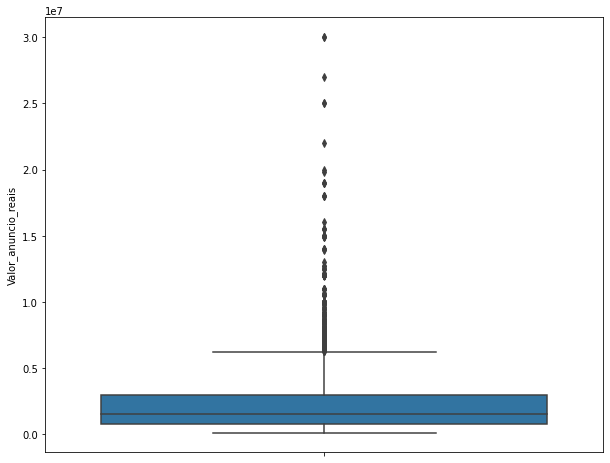

In [196]:
dados_vendas_censo.drop(dados_vendas_censo.query("Valor_anuncio_reais > 30000000 | Valor_anuncio_reais < 100000").index, inplace = True)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio_reais")
plt.show()

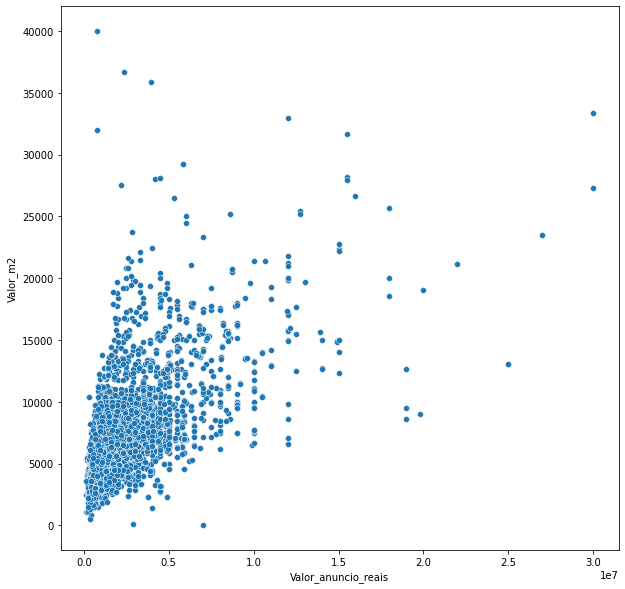

In [197]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo, x="Valor_anuncio_reais", y="Valor_m2")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff413f25890>,
      dtype=object)

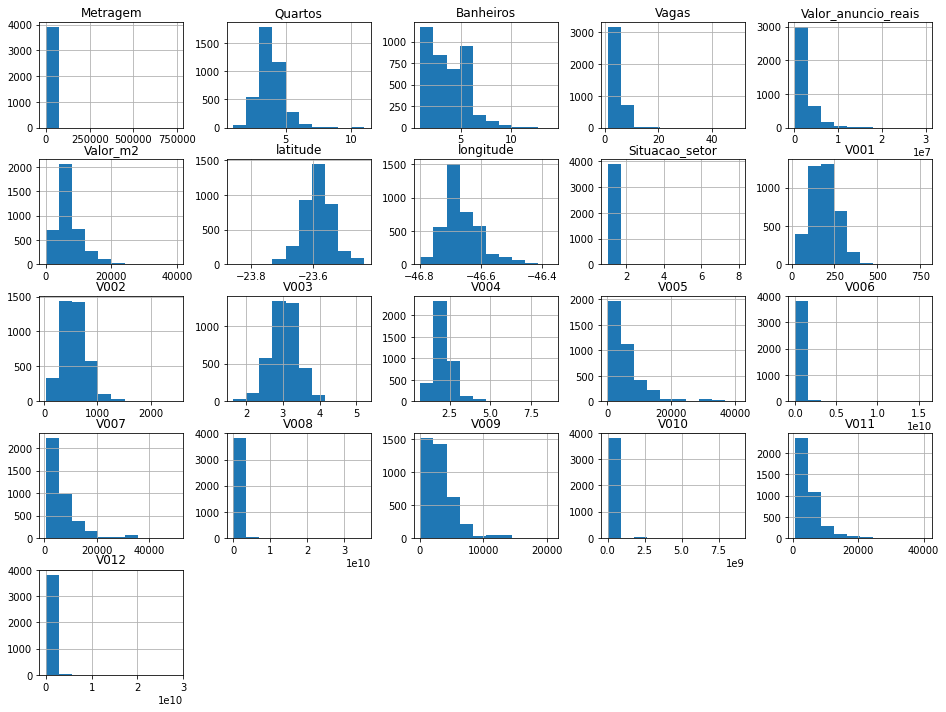

In [198]:
fig = plt.figure(figsize = (16,12))
ax = fig.gca()
dados_vendas_censo.hist(ax=ax)

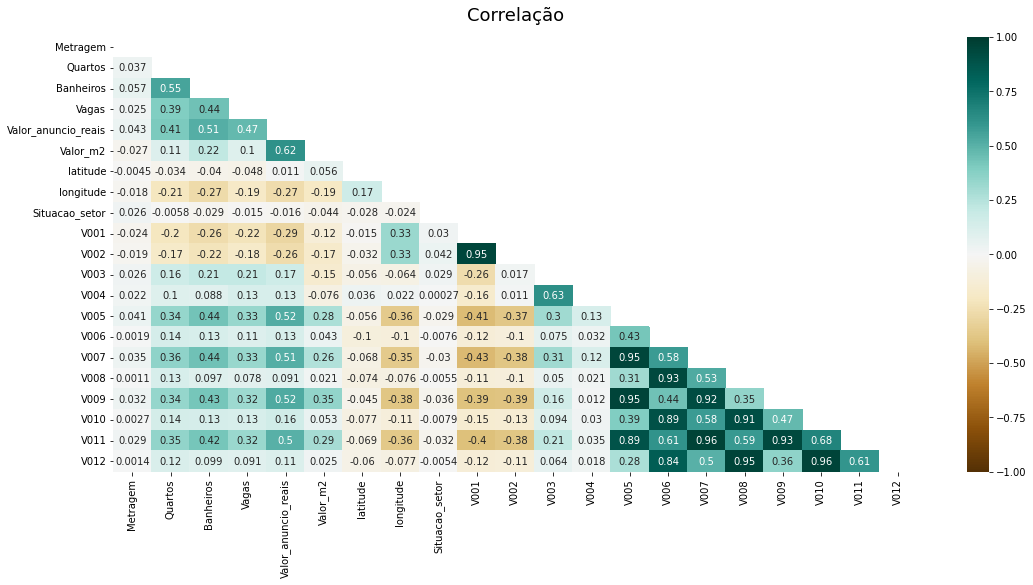

In [199]:
plt.figure(figsize=(18, 8))
mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas_censo.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

##Treinamento e Análise do Modelo 

In [200]:
dados_vendas_censo = dados_vendas_censo.drop(['Rua','Cidade','Bairro'],axis=1)

In [201]:
#Importatne retirar a coluna calculada de Valor_m2, pois ela recebe os valores do anúncio que queremos prever
# dessa forma o modelo estaria "recebendo" os valores a serem preditos indiretamente 

dados_vendas_censo = dados_vendas_censo.drop(['Valor_m2'],axis=1)

In [203]:
# separar 30% dos dados para teste

X = dados_vendas_censo.drop(['Valor_anuncio_reais'],axis=1)
y = dados_vendas_censo['Valor_anuncio_reais']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [204]:
# normalizar os dados em uma mesma escala

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

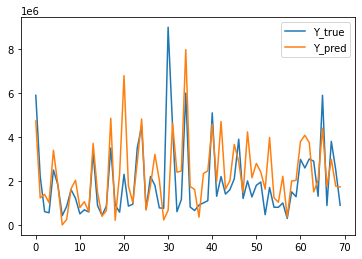

In [208]:
# plotar o y_true e o y_pred do conjunto de teste

model = LinearRegression().fit(X_train_scaled, y_train)
y_pred= model.predict(X_test_scaled)

n_samples = 70

plt.plot(range(n_samples), y_test[0:n_samples], label='Y_true')
plt.plot(range(n_samples), y_pred[0:n_samples], label='Y_pred')
plt.legend()
plt.show()

In [206]:
r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred) 

print('R2: ',r2_test)
print('MAE',mae_test)

R2:  0.4500669419556932
MAE 1055048.5827515505


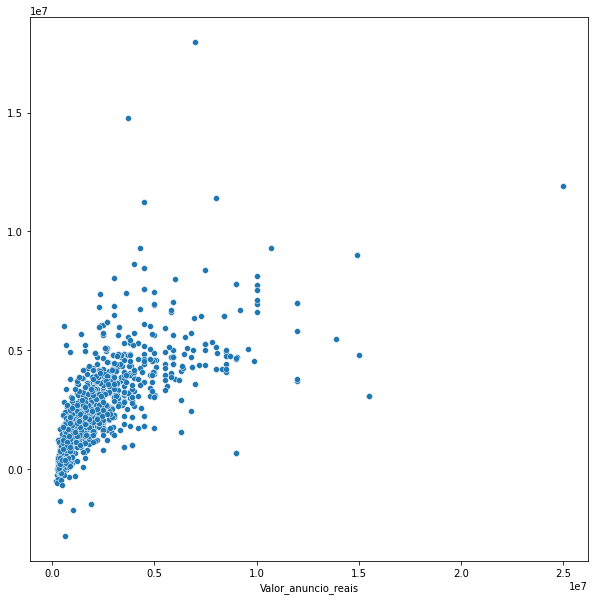

In [207]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred)